
Step 01:

KNN Regressor:
1. Import data set
2. Seperate x and y (y=Weight)
3. Train = 70%, Test = 30%
4. ApplyLinear Regression
5. Evaluate Model (Accuracy, MSE, Prediction)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate Model (Accuracy, MSE, Prediction)

Tuning:
1. Apply Randomized Search CV to select best K vlaue
2. Compare accuracy with default KNN and After tuning K value
3. Evaluate Model (Accuracy, MSE, Prediction) and Compare with Old KNN model and Linear regression as well.


In [68]:
#Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [69]:
#Load dataset
dataset=pd.read_csv("weight-height.csv")
df=dataset.copy()
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [70]:
# Checking the missing value
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [10]:
# Separate dependent and Independent varibale
x=df.drop(['Gender','Weight'],axis=1)
y=df['Weight']

In [20]:
#Spliting dataset for training and testing purpose

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3,random_state=1) 

# Linear Regression model

In [56]:
from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()
reg_model.fit(xtrain, ytrain)
#reg_model.coef_
#reg_model.intercept_
pred=reg_model.predict(xtest)
accuracy=reg_model.score(xtest,ytest)
print("Accuracy of Linear Regression:",round(accuracy,2)*100,'%')

Accuracy of Linear Regression: 86.0 %


In [59]:
#Evaluation the Linear Regression model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred)
print("MSE of Linear Regression: ",round(mse,2))

MSE of Linear Regression:  149.64


In [60]:
# Predict the Linear Regression model
reg_model.predict([[76]])

array([235.90739354])

# KNN Regression Model

In [62]:
from sklearn.neighbors import KNeighborsRegressor
reg_knn=KNeighborsRegressor()
reg_knn.fit(xtrain,ytrain)
pred_reg_knn=reg_knn.predict(xtest)
accuracy_knn=reg_knn.score(xtest,ytest)
print("Accuracy of KNN Regression: ", round(accuracy_knn,2)*100,'%')

Accuracy of KNN Regression:  83.0 %


In [65]:
# Calculate the mean squared error for KNN regression
from sklearn.metrics import mean_squared_error
mse_knn=mean_squared_error(ytest,pred_reg_knn)
print("MSE of KNN Regression: ",round(mse_knn,2))

MSE of KNN Regression:  180.19


In [66]:
reg_knn.predict([[76]])

array([230.72518426])

# Discussion:

I have got the higest accuracy in linear regression which is 86% rather than KNN regression. Also, I have got the lower mean squared error and better prediction results in linear regression. Linear regression model is perfomr better than KNN regression. 

# Tuning Randomized Search CV:

* Apply Randomized Search CV to select best K vlaue
* Compare accuracy with default KNN and After tuning K value
* Evaluate Model (Accuracy, MSE, Prediction) and Compare with Old KNN model and Linear regression as well.

In [105]:
#K_means cluster algorithm
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
#calculate number of cluster
wcss=[]
clusters=range(1,12)
for k in range(1,12):
  km = KMeans(n_clusters=k)
  km.fit(df[['Height','Weight']]) 
  wcss.append(km.inertia_)

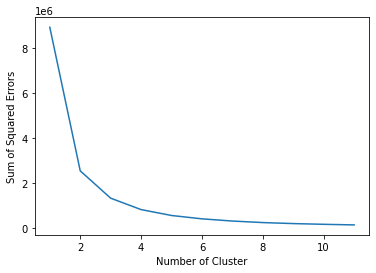

In [106]:
plt.plot(clusters, wcss)
plt.xlabel("Number of Cluster")
plt.ylabel("Sum of Squared Errors")
plt.show()

In [122]:
#!pip install kneed
from kneed import KneeLocator
kneed_locator=KneeLocator(clusters, wcss, curve='convex',direction='decreasing')
optimal_cluster=kneed_locator.knee
print('Optimal Number of Cluster is', optimal_cluster)

Optimal Number of Cluster is 3


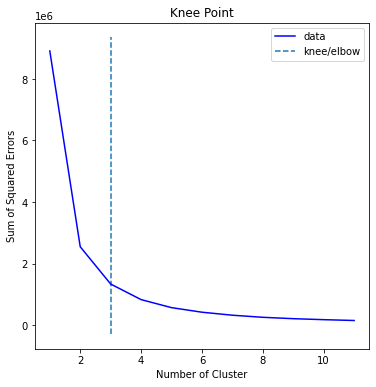

In [123]:
kneed_locator.plot_knee()
plt.xlabel("Number of Cluster")
plt.ylabel("Sum of Squared Errors")
plt.show()

In [131]:
from sklearn.neighbors import KNeighborsRegressor

#n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None
reg_knn=KNeighborsRegressor(n_neighbors=7,weights='uniform',algorithm='kd_tree',leaf_size=30,p=2,metric='minkowski')
reg_knn.fit(xtrain,ytrain)
pred_reg_knn=reg_knn.predict(xtest)
accuracy_knn=reg_knn.score(xtest,ytest)
print("Accuracy of KNN Regression: ", round(accuracy_knn,2)*100,'%')

Accuracy of KNN Regression:  84.0 %


In [132]:
# Calculate the mean squared error for KNN regression
from sklearn.metrics import mean_squared_error
mse_knn=mean_squared_error(ytest,pred_reg_knn)
print("MSE of KNN Regression: ",round(mse_knn,2))

MSE of KNN Regression:  171.51


In [133]:
reg_knn.predict([[76]])

array([231.92957151])

# Discussion: 
I have got the higest accuracy when k is 7. 2% accuracy is increased than older default K value 5 for KNN regression, but still 2% is less accuracy from  linear regression. Also, 10% is improved the mean squared error after tunning the KNN regression.